In [275]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [276]:
import pandas as pd
raw_data = pd.read_csv('1.04. Real-life example.csv')

In [277]:
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,Volkswagen,15000,sedan,120,2.0,Diesel,yes,2010,Passat
1,BMW,20000,SUV,85,3.0,Petrol,no,2015,X5
2,Mercedes,30000,coupe,95,2.5,Petrol,yes,2020,C-Class
3,Toyota,25000,hatchback,100,1.8,Hybrid,yes,2018,Corolla
4,Honda,18000,sedan,110,2.2,Diesel,no,2012,Civic


In [278]:
raw_data.tail()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
10,Kia,15000,sedan,125,1.6,Hybrid,yes,2015,Optima
11,Volvo,28000,station,95,2.0,Diesel,no,2021,V60
12,Subaru,21000,SUV,110,2.5,Petrol,yes,2018,Forester
13,Mazda,20000,sedan,115,2.2,Diesel,no,2016,Mazda6
14,Jeep,35000,SUV,85,3.2,Petrol,yes,2022,Cherokee


In [279]:
# Removing unwanted columns Model
data = raw_data.drop(['Model'],axis=1,errors='ignore')
print(data)

         Brand  Price       Body  Mileage  EngineV Engine Type Registration  \
0   Volkswagen  15000      sedan      120      2.0      Diesel          yes   
1          BMW  20000        SUV       85      3.0      Petrol           no   
2     Mercedes  30000      coupe       95      2.5      Petrol          yes   
3       Toyota  25000  hatchback      100      1.8      Hybrid          yes   
4        Honda  18000      sedan      110      2.2      Diesel           no   
5         Audi  22000      sedan      105      2.0      Petrol          yes   
6         Ford  17000  hatchback      130      1.6      Diesel           no   
7    Chevrolet  19000        SUV       90      2.4      Petrol          yes   
8      Hyundai  16000  hatchback      140      1.8      Petrol           no   
9       Nissan  23000        SUV       80      2.0      Diesel          yes   
10         Kia  15000      sedan      125      1.6      Hybrid          yes   
11       Volvo  28000    station       95      2.0  

In [280]:
data.isnull().sum()*100/len(data)

Brand           0.0
Price           0.0
Body            0.0
Mileage         0.0
EngineV         0.0
Engine Type     0.0
Registration    0.0
Year            0.0
dtype: float64

In [281]:
data.dropna(axis=0, inplace=True)

In [282]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         15 non-null     object 
 1   Price         15 non-null     int64  
 2   Body          15 non-null     object 
 3   Mileage       15 non-null     int64  
 4   EngineV       15 non-null     float64
 5   Engine Type   15 non-null     object 
 6   Registration  15 non-null     object 
 7   Year          15 non-null     int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 1.1+ KB


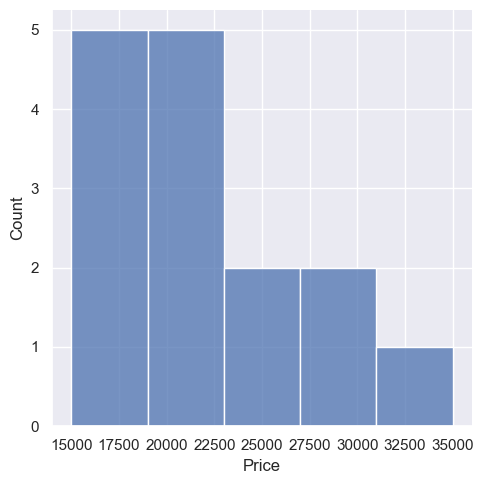

In [283]:
import seaborn as sns
sns.displot(data['Price'])

In [284]:
data['Price'].describe()

count       15.000000
mean     21600.000000
std       5791.619561
min      15000.000000
25%      17500.000000
50%      20000.000000
75%      24000.000000
max      35000.000000
Name: Price, dtype: float64

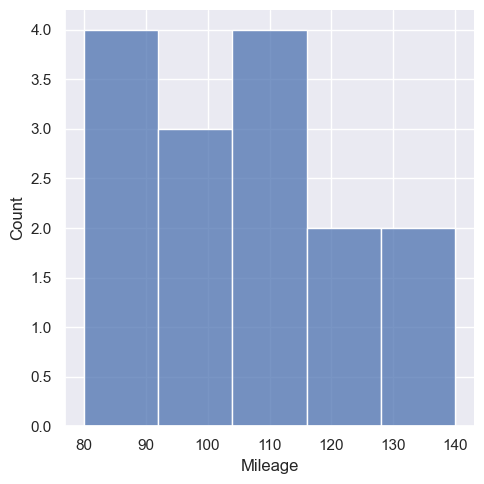

In [285]:
sns.displot(data['Mileage'])

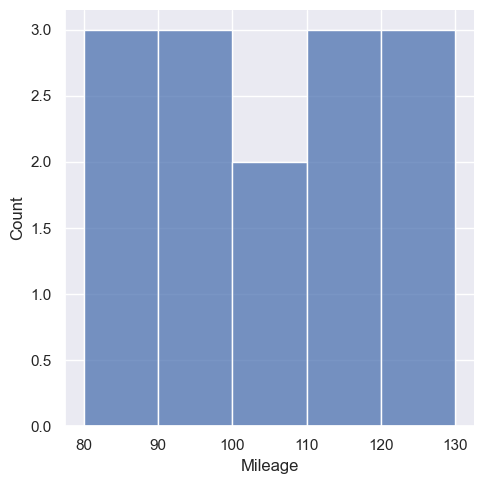

In [286]:
q = data['Mileage'].quantile(0.99)
data = data[data['Mileage']<q]
sns.displot(data['Mileage'])

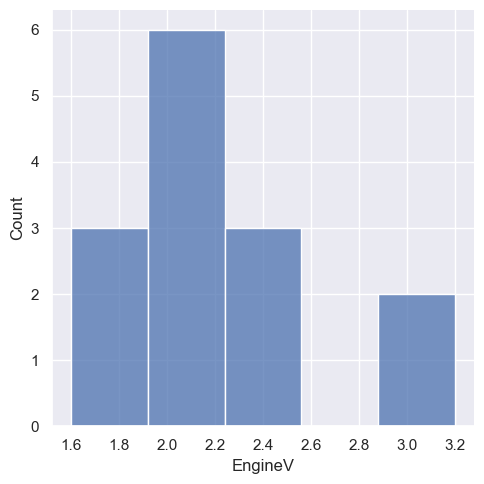

In [287]:
sns.displot(data['EngineV'])

In [288]:
data['EngineV'].describe()

count    14.000000
mean      2.214286
std       0.472077
min       1.600000
25%       2.000000
50%       2.100000
75%       2.475000
max       3.200000
Name: EngineV, dtype: float64

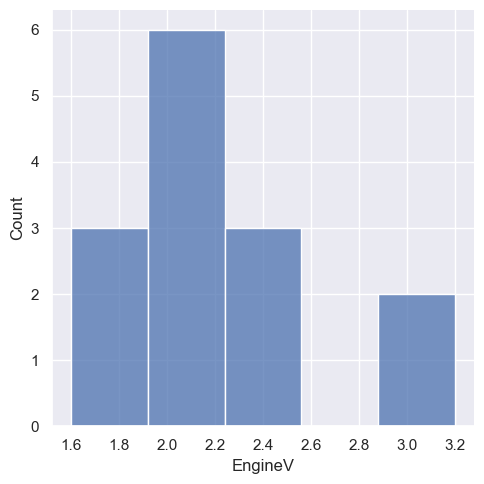

In [289]:
data = data[data['EngineV']<6.5]
sns.displot(data['EngineV'])

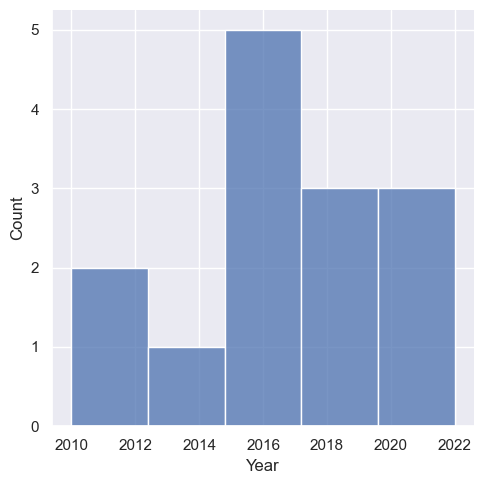

In [290]:
sns.displot(data['Year'])

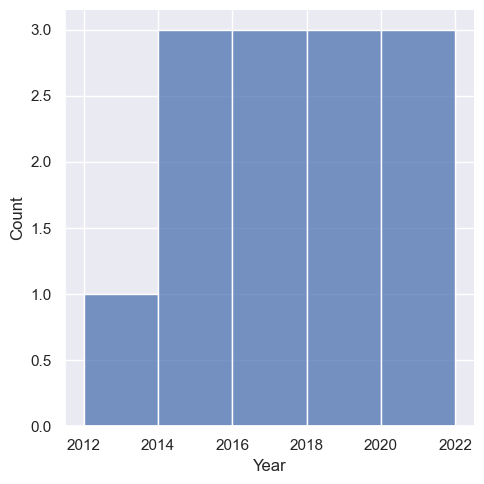

In [291]:
q = data['Year'].quantile(0.01)
data = data[data['Year']>q]
sns.displot(data['Year'])

In [292]:
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
1,BMW,20000,SUV,85,3.0,Petrol,no,2015
2,Mercedes,30000,coupe,95,2.5,Petrol,yes,2020
3,Toyota,25000,hatchback,100,1.8,Hybrid,yes,2018
4,Honda,18000,sedan,110,2.2,Diesel,no,2012
5,Audi,22000,sedan,105,2.0,Petrol,yes,2016


In [293]:
data_cleaned =  data.reset_index(drop=True)

In [294]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,13,13.000000,13,13.000000,13.000000,13,13,13.000000
unique,13,NaN,5,NaN,NaN,3,2,NaN
top,BMW,NaN,SUV,NaN,NaN,Petrol,yes,NaN
freq,1,NaN,5,NaN,NaN,6,8,NaN
mean,NaN,22538.461538,NaN,101.923077,2.230769,NaN,NaN,2017.153846
std,NaN,5651.185489,NaN,15.617626,0.487142,NaN,NaN,2.882307
min,NaN,15000.000000,NaN,80.000000,1.600000,NaN,NaN,2012.000000
25%,NaN,19000.000000,NaN,90.000000,2.000000,NaN,NaN,2015.000000
50%,NaN,21000.000000,NaN,100.000000,2.200000,NaN,NaN,2017.000000
75%,NaN,25000.000000,NaN,110.000000,2.500000,NaN,NaN,2019.000000


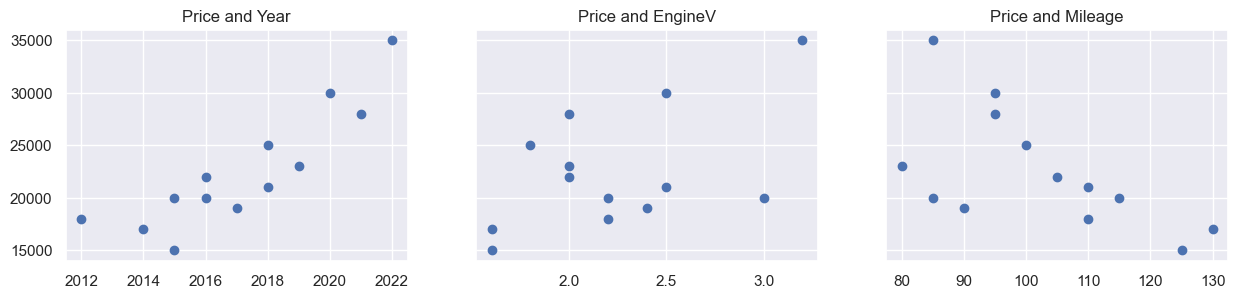

In [295]:
import matplotlib.pyplot as plt
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')
plt.show()

In [296]:
# Let's transform 'Price' with a log transformation
log_price = np.log(data_cleaned['Price'])

# Then we add it to our data frame
data_cleaned['log_price'] = log_price


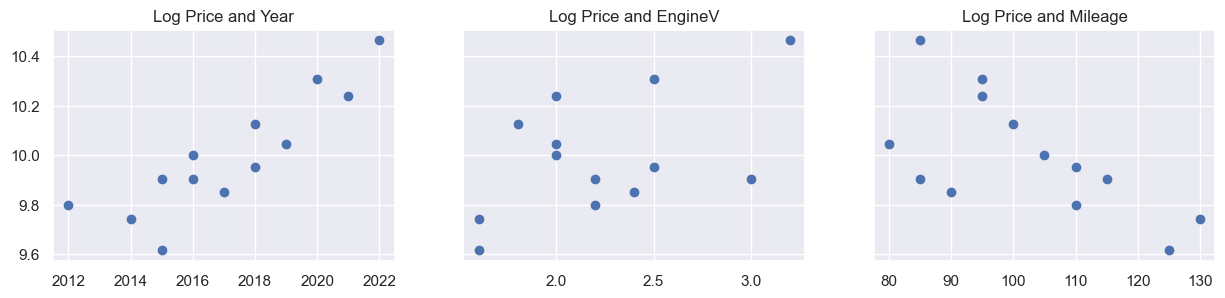

In [297]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')
plt.show()


In [298]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)     


In [299]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned[['Mileage','Year','EngineV']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,76.445883,Mileage
1,179.364930,Year
2,39.080134,EngineV


In [300]:
data = data_cleaned.drop(['Year'],axis=1)

In [301]:
data =pd.get_dummies(data, drop_first=True)

In [302]:
data.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW', 'Brand_Chevrolet',
       'Brand_Ford', 'Brand_Honda', 'Brand_Jeep', 'Brand_Kia',
       'Brand_Mazda', 'Brand_Mercedes', 'Brand_Nissan', 'Brand_Subaru',
       'Brand_Toyota', 'Brand_Volvo', 'Body_coupe', 'Body_hatchback',
       'Body_sedan', 'Body_station', 'Engine Type_Hybrid',
       'Engine Type_Petrol', 'Registration_yes'], dtype=object)

In [303]:
data.tail()


,Mileage,EngineV,log_price,Brand_BMW,Brand_Chevrolet,Brand_Ford,Brand_Honda,Brand_Jeep,Brand_Kia,Brand_Mazda,...,Brand_Subaru,Brand_Toyota,Brand_Volvo,Body_coupe,Body_hatchback,Body_sedan,Body_station,Engine Type_Hybrid,Engine Type_Petrol,Registration_yes
8,125,1.6,9.615805,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1
9,95,2.0,10.239960,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
10,110,2.5,9.952278,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
11,115,2.2,9.903488,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
12,85,3.2,10.463103,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1


In [304]:

cols = [
    'log_price', 'Mileage', 'EngineV',
     'Brand_Toyota','Brand_Honda' ,  'Brand_Jeep',  'Brand_Kia','Body_sedan', 'Body_SUV','Body_hatchback', 'Engine Type_Petrol','Engine Type_Diesel','Engine Type_Hybrid', 'Registration_yes']
print(data.head())


   Mileage  EngineV  log_price  Brand_BMW  Brand_Chevrolet  Brand_Ford  \
0       85      3.0   9.903488          1                0           0   
1       95      2.5  10.308953          0                0           0   
2      100      1.8  10.126631          0                0           0   
3      110      2.2   9.798127          0                0           0   
4      105      2.0   9.998798          0                0           0   

   Brand_Honda  Brand_Jeep  Brand_Kia  Brand_Mazda  ...  Brand_Subaru  \
0            0           0          0            0  ...             0   
1            0           0          0            0  ...             0   
2            0           0          0            0  ...             0   
3            1           0          0            0  ...             0   
4            0           0          0            0  ...             0   

   Brand_Toyota  Brand_Volvo  Body_coupe  Body_hatchback  Body_sedan  \
0             0            0           0    

In [305]:
targets = data_preprocessed['log_price']

inputs = data_preprocessed.drop(['log_price'],axis=1)

In [306]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

In [307]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Spliting the variables with an 80-20 split and some random state
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [308]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

In [309]:
# Checking the outputs of the regression
y_hat = reg.predict(x_train)


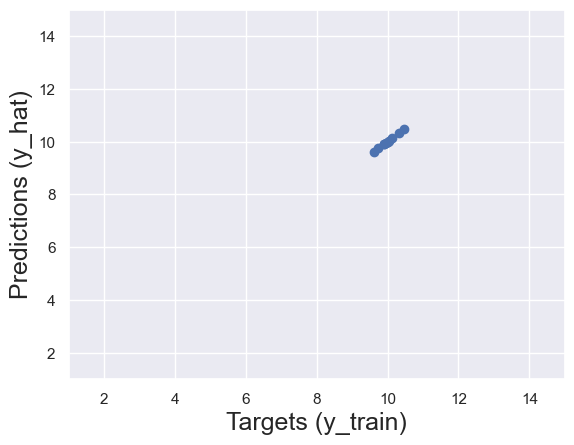

In [310]:
# Comparing the targets (y_train) and the predictions (y_hat)
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(1,15)
plt.ylim(1,15)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

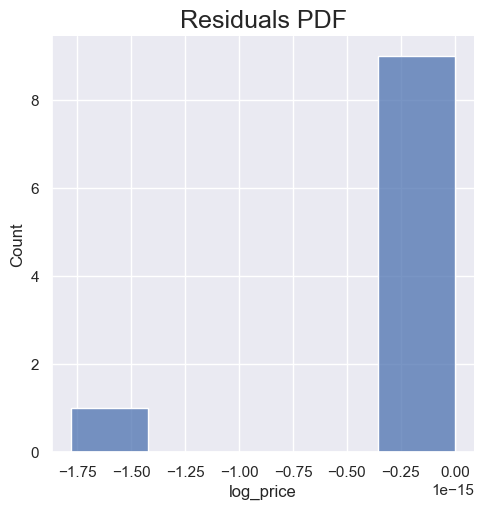

In [311]:
sns.displot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [312]:
score =reg.score(x_train,y_train)
intercept =reg.intercept_
coefficents =reg.coef_
print("Score: ",score)
print("Intercept: ",intercept)
print("Coefficents: ",coefficents)

Score:  1.0
Intercept:  9.999593594703008
Coefficents:  [-4.54216697e-02  3.61528919e-02 -5.14449423e-02  7.76904681e-19
 -2.54727809e-02 -1.55063794e-17  7.34804691e-02 -5.65662913e-02
  9.98978215e-03  2.74393497e-02 -6.37192836e-03 -2.80647366e-02
  3.86648275e-02  2.18018893e-30  2.74393497e-02  9.74297210e-03
 -1.62987471e-02  2.18018893e-30 -1.32211072e-02  2.12506848e-02
  3.66579430e-02]


In [313]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-4.542167e-02
1,EngineV,3.615289e-02
2,Brand_BMW,-5.144494e-02
3,Brand_Chevrolet,7.769047e-19
4,Brand_Ford,-2.547278e-02
5,Brand_Honda,-1.550638e-17
6,Brand_Jeep,7.348047e-02
7,Brand_Kia,-5.656629e-02
8,Brand_Mazda,9.989782e-03
9,Brand_Mercedes,2.743935e-02


In [314]:
y_hat_test = reg.predict(x_test)

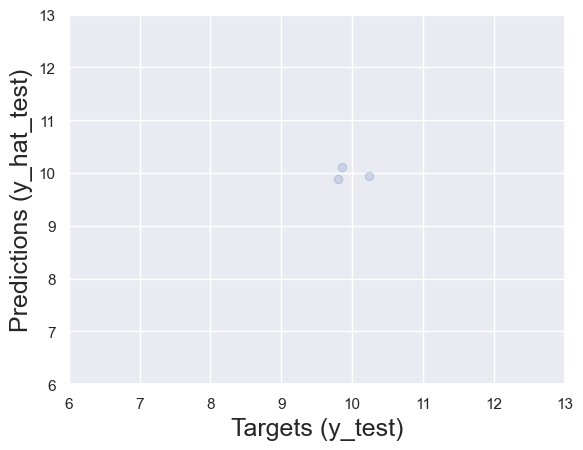

In [315]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [316]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])

In [317]:
df_pf['Target'] = np.exp(y_test)
df_pf


,Prediction,Target
0,24597.898075,NaN
1,20877.044555,NaN
2,19557.883108,NaN


In [318]:
y_test = y_test.reset_index(drop=True)


In [319]:
df_pf['Target'] = np.exp(y_test)


In [320]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']


In [321]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,24597.898075,19000.0,-5597.898075,29.462621
1,20877.044555,28000.0,7122.955445,25.439127
2,19557.883108,18000.0,-1557.883108,8.654906
